In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/fraud.csv'
data = pd.read_csv(file_url)
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [5]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [6]:
round(data.describe(),2)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1.852394e+06,1852394.00,1852394.00,1852394.00
mean,4.173860e+17,70.06,48813.26,38.54,-90.23,88643.67,1.358674e+09,38.54,-90.23,0.01
std,1.309115e+18,159.25,26881.85,5.07,13.75,301487.62,1.819508e+07,5.11,13.76,0.07
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.64,26237.00,34.67,-96.80,741.00,1.343017e+09,34.74,-96.90,0.00
50%,3.521417e+15,47.45,48174.00,39.35,-87.48,2443.00,1.357089e+09,39.37,-87.44,0.00
75%,4.642255e+15,83.10,72042.00,41.94,-80.16,20328.00,1.374581e+09,41.96,-80.25,0.00
max,4.992346e+18,28948.90,99921.00,66.69,-67.95,2906700.00,1.388534e+09,67.51,-66.95,1.00


In [7]:
data.drop(['first','last','street','city','state','zip','trans_num','unix_time','job','merchant'],axis=1,inplace=True) # 필요없는 변수 제거

In [8]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [9]:
amt_info = data.groupby('cc_num').aggregate(['mean','std'])['amt'].reset_index()

C:\Users\kjb00\AppData\Local\Temp\ipykernel_16388\143098203.py:1: FutureWarning: ['trans_date_trans_time', 'category', 'gender', 'dob'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  amt_info = data.groupby('cc_num').aggregate(['mean','std'])['amt'].reset_index()


In [10]:
amt_info.head()

,cc_num,mean,std
0,60416207185,59.257796,142.869746
1,60422928733,65.483159,92.042844
2,60423098130,96.376084,1000.693872
3,60427851591,107.487550,131.014534
4,60487002085,64.096925,153.207660


In [11]:
data = data.merge(amt_info,on='cc_num',how='left')

In [12]:
data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,89.408743,127.530101
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,69.924272,116.688602
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,80.090040,280.077880
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,95.341146,94.322842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,62.347968,110.821153
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,50.452289,168.361122
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,88.704297,119.948793
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,60.998052,89.525640


In [13]:
data['amt_z_score'] = (data['amt']-data['mean']) / data['std'] 

In [14]:
data[['amt','mean','std','amt_z_score']].head()

,amt,mean,std,amt_z_score
0,4.97,89.408743,127.530101,-0.662108
1,107.23,56.078113,159.201852,0.321302
2,220.11,69.924272,116.688602,1.287064
3,45.00,80.090040,280.077880,-0.125287
4,41.96,95.341146,94.322842,-0.565941


In [15]:
data.drop(['mean','std'],axis=1,inplace=True) # z-점수를 필요한 값일뿐 예측에는 필요 없으니 제거한다.

In [16]:
category_info = data.groupby(['cc_num','category']).aggregate(['mean','std'])['amt'].reset_index()

C:\Users\kjb00\AppData\Local\Temp\ipykernel_16388\870461406.py:1: FutureWarning: ['trans_date_trans_time', 'gender', 'dob'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  category_info = data.groupby(['cc_num','category']).aggregate(['mean','std'])['amt'].reset_index()


In [17]:
category_info

,cc_num,category,mean,std
0,60416207185,entertainment,51.838855,65.485714
1,60416207185,food_dining,26.737097,46.382603
2,60416207185,gas_transport,59.779429,15.758267
3,60416207185,grocery_net,52.152973,17.694871
4,60416207185,grocery_pos,101.557761,21.894156
...,...,...,...,...
13166,4992346398065154184,misc_pos,60.003043,167.226191
13167,4992346398065154184,personal_care,48.777227,49.523818
13168,4992346398065154184,shopping_net,86.280136,217.047242
13169,4992346398065154184,shopping_pos,64.213333,169.239073


In [18]:
data = data.merge(category_info,on=['cc_num','category'],how='left')

In [19]:
data['category_z_sore'] = (data['amt']-data['mean']) / data['std']
data.drop(['mean','std'],axis=1,inplace=True)

In [20]:
data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,category_z_sore
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,-0.167639,-0.047862
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,-0.592099,-0.007423


In [21]:
import geopy.distance

# geopy.distance.distance((위도1,경도1),(위도2,경도2))

data['merch_coord'] = pd.Series(zip(data['merch_lat'],data['merch_long']))
data['cust_coord'] = pd.Series(zip(data['lat'],data['long']))

# 위도 경도를 한 변수로 합치기

In [22]:
data['distance'] = data.apply(lambda x : geopy.distance.distance(x['merch_coord'],x['cust_coord']).km,axis=1)

In [23]:
data['distance'].sort_values(ascending=False)

926894     151.868200
1562431    150.673743
216446     150.580192
161915     149.610127
252294     149.205571
              ...    
1526159      0.124180
42055        0.113386
273923       0.094058
556401       0.066731
381941       0.022274
Name: distance, Length: 1852394, dtype: float64

In [24]:
distance_info = data.groupby('cc_num').aggregate(['mean','std'])['distance'].reset_index()
distance_info

C:\Users\kjb00\AppData\Local\Temp\ipykernel_16388\1978770741.py:1: FutureWarning: ['trans_date_trans_time', 'category', 'gender', 'dob', 'merch_coord', 'cust_coord'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  distance_info = data.groupby('cc_num').aggregate(['mean','std'])['distance'].reset_index()


,cc_num,mean,std
0,60416207185,73.534542,28.698149
1,60422928733,78.986422,29.299240
2,60423098130,77.826916,28.187560
3,60427851591,75.711544,28.977432
4,60487002085,79.442907,28.767086
...,...,...,...
994,4958589671582726883,76.735763,29.123745
995,4973530368125489546,78.753844,29.450837
996,4980323467523543940,72.272008,28.279840
997,4989847570577635369,76.969707,29.386961


In [25]:
data = data.merge(distance_info,on='cc_num',how='left')

In [26]:
data['distance_z_score'] = (data['distance'] - data['mean']) / data['std']
data.drop(['mean','std'],axis=1,inplace=True)

In [27]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,category_z_sore,merch_coord,cust_coord,distance,distance_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.773821,0.030974
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.216618,-1.475224
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)",108.102912,1.160572
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.685115,0.818063
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.702395,0.064037


In [28]:
data['age'] = 2024 - pd.to_datetime(data['dob']).dt.year

In [29]:
data['age']

0          36
1          46
2          62
3          57
4          38
           ..
1852389    58
1852390    25
1852391    43
1852392    59
1852393    31
Name: age, Length: 1852394, dtype: int64

In [30]:
data.drop(['cc_num','lat','long','merch_lat','merch_long','dob','merch_coord','cust_coord'],axis=1,inplace=True)
data.head()

,trans_date_trans_time,category,amt,gender,city_pop,is_fraud,amt_z_score,category_z_sore,distance,distance_z_score,age
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,0,-0.662108,-0.688297,78.773821,0.030974,36
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,0,0.321302,0.317631,30.216618,-1.475224,46
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,0,1.287064,2.872509,108.102912,1.160572,62
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,0,-0.125287,-1.050197,95.685115,0.818063,57
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,0,-0.565941,1.312866,77.702395,0.064037,38


In [31]:
data = pd.get_dummies(data,columns=['gender','category'],drop_first=True)
data

,trans_date_trans_time,amt,city_pop,is_fraud,amt_z_score,category_z_sore,distance,distance_z_score,age,gender_M,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,4.97,3495,0,-0.662108,-0.688297,78.773821,0.030974,36,0,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,107.23,149,0,0.321302,0.317631,30.216618,-1.475224,46,0,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,220.11,4154,0,1.287064,2.872509,108.102912,1.160572,62,1,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,45.00,1939,0,-0.125287,-1.050197,95.685115,0.818063,57,1,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,41.96,99,0,-0.565941,1.312866,77.702395,0.064037,38,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,43.77,519,0,-0.167639,-0.047862,77.032467,0.052081,58,1,...,0,1,0,0,0,0,0,0,0,0
1852390,2020-12-31 23:59:09,111.84,28739,0,0.364619,1.163822,100.023736,0.693848,25,1,...,0,0,0,1,0,0,0,0,0,0
1852391,2020-12-31 23:59:15,86.88,3684,0,-0.015209,0.440137,80.887812,0.288293,43,0,...,0,0,0,1,0,0,0,0,0,0
1852392,2020-12-31 23:59:24,7.99,129,0,-0.592099,-0.007423,53.060882,-0.730061,59,1,...,0,0,0,0,0,0,0,0,0,1


In [32]:
data.set_index('trans_date_trans_time',inplace=True)

In [33]:
data

,amt,city_pop,is_fraud,amt_z_score,category_z_sore,distance,distance_z_score,age,gender_M,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,4.97,3495,0,-0.662108,-0.688297,78.773821,0.030974,36,0,0,...,0,0,0,0,1,0,0,0,0,0
2019-01-01 00:00:44,107.23,149,0,0.321302,0.317631,30.216618,-1.475224,46,0,0,...,1,0,0,0,0,0,0,0,0,0
2019-01-01 00:00:51,220.11,4154,0,1.287064,2.872509,108.102912,1.160572,62,1,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:01:16,45.00,1939,0,-0.125287,-1.050197,95.685115,0.818063,57,1,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:03:06,41.96,99,0,-0.565941,1.312866,77.702395,0.064037,38,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:59:07,43.77,519,0,-0.167639,-0.047862,77.032467,0.052081,58,1,0,...,0,1,0,0,0,0,0,0,0,0
2020-12-31 23:59:09,111.84,28739,0,0.364619,1.163822,100.023736,0.693848,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2020-12-31 23:59:15,86.88,3684,0,-0.015209,0.440137,80.887812,0.288293,43,0,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
train = data[data.index < '2020-07-01']
test = data[data.index >= '2020-07-01']
len(test)/len(data)

0.2837738623640543

In [35]:
X_train = train.drop('is_fraud',axis=1)
y_train = train['is_fraud']
X_test = test.drop('is_fraud',axis=1)
y_test = test['is_fraud']

In [36]:
import lightgbm as lgb

model_1 = lgb.LGBMClassifier(random_state=100)
model_1.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434


LGBMClassifier(random_state=100)

In [37]:
pred = model_1.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report, roc_auc_score

accuracy_score(y_test,pred)

0.9970722575956747

<Axes: >

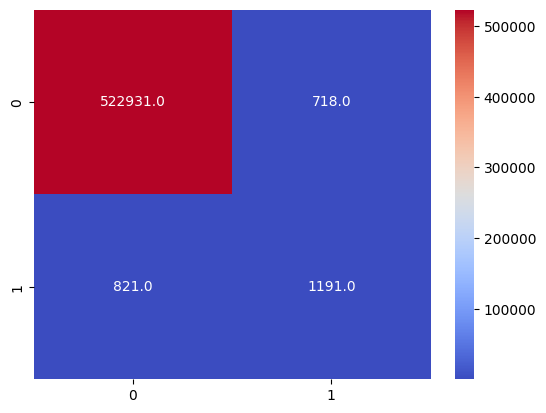

In [38]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='coolwarm',fmt='.1f')

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.62      0.59      0.61      2012

    accuracy                           1.00    525661
   macro avg       0.81      0.80      0.80    525661
weighted avg       1.00      1.00      1.00    525661



In [40]:
proba_1 = model_1.predict_proba(X_test) # proba를 사용하면 0과 1이 아닌 소수점 형태의 결과를 얻을 수 있다.
proba_1

array([[9.99968772e-01, 3.12278515e-05],
       [9.99974048e-01, 2.59518936e-05],
       [9.99960945e-01, 3.90554711e-05],
       ...,
       [9.99964958e-01, 3.50416128e-05],
       [9.99840865e-01, 1.59135272e-04],
       [9.99944259e-01, 5.57405598e-05]])

In [41]:
proba_1[:,1] # 1에 대한 예측 결과만 출력
proba_1 = proba_1[:,1]

In [42]:
proba_int1 = (proba_1>0.2).astype(int) # 0.2 기준으로 분류
proba_int2 = (proba_1>0.8).astype(int) # 0.8 기준으로 분류

In [45]:
print(confusion_matrix(y_test,pred))

[[522931    718]
 [   821   1191]]


In [43]:
print(confusion_matrix(y_test,proba_int1))

[[522138   1511]
 [   598   1414]]


In [44]:
print(confusion_matrix(y_test,proba_int2))

[[523184    465]
 [   958   1054]]


In [46]:
print(classification_report(y_test,proba_int1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.48      0.70      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.74      0.85      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [47]:
print(classification_report(y_test,proba_int2)) # 정밀도가 높아진 반면 재현율이 다소 떨어진다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.69      0.52      0.60      2012

    accuracy                           1.00    525661
   macro avg       0.85      0.76      0.80    525661
weighted avg       1.00      1.00      1.00    525661



In [52]:
roc_auc_score(y_test,proba_1) # AUC는 다른 평가지표와는 다르게 0과 1로 나누어진 값이 아닌 소수점 값 즉 predict_proba()로 예측된 값을 그대로 사용
# 보통 0.8 이상이면 상당히 높은 편이다.

0.9365997516654113

In [53]:
from sklearn.model_selection import RandomizedSearchCV
parmas = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.01,0.05,0.1,0.3],
    'lambda_l1' : [0,10,20,30,50],
    'lambda_l2' : [0,10,20,30,50],
    'max_depth' : [5,10,15,20],
    'subsample' : [0.6,0.8,1]
}

model_2 = lgb.LGBMClassifier(random_state=100)
rs = RandomizedSearchCV(model_2,param_distributions=parmas,n_iter=30,scoring='roc_auc',random_state=100,n_jobs=-1)

In [54]:
import time

start_time = time.time()
rs.fit(X_train,y_train)
print(time.time()-start_time)

KeyboardInterrupt: 

In [55]:
data

,amt,city_pop,is_fraud,amt_z_score,category_z_sore,distance,distance_z_score,age,gender_M,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,4.97,3495,0,-0.662108,-0.688297,78.773821,0.030974,36,0,0,...,0,0,0,0,1,0,0,0,0,0
2019-01-01 00:00:44,107.23,149,0,0.321302,0.317631,30.216618,-1.475224,46,0,0,...,1,0,0,0,0,0,0,0,0,0
2019-01-01 00:00:51,220.11,4154,0,1.287064,2.872509,108.102912,1.160572,62,1,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:01:16,45.00,1939,0,-0.125287,-1.050197,95.685115,0.818063,57,1,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:03:06,41.96,99,0,-0.565941,1.312866,77.702395,0.064037,38,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:59:07,43.77,519,0,-0.167639,-0.047862,77.032467,0.052081,58,1,0,...,0,1,0,0,0,0,0,0,0,0
2020-12-31 23:59:09,111.84,28739,0,0.364619,1.163822,100.023736,0.693848,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2020-12-31 23:59:15,86.88,3684,0,-0.015209,0.440137,80.887812,0.288293,43,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
parmas_set = {
    'n_estimators' : 1000, # 총 1000개의 결과물이 출력
    'learning_rate' : 0.05,
    'lambda_l1' : 0,
    'lambda_l2' : 20,
    'max_depth' : 15,
    'subsample' : 1,
    'metrics' : 'auc',
    'verbose' : 100 # 출력 간격 설정 100,200,300 ... 
}

In [64]:
train = data[data.index < '2020-01-01']
val = data[(data.index >= '2020-01-01') & (data.index <'2020-07-01')]
test = data[data.index >= '2020-07-01']

In [65]:
X_train = train.drop('is_fraud',axis=1)
X_val = val.drop('is_fraud',axis=1)
X_test = test.drop('is_fraud',axis=1)
y_train = train['is_fraud']
y_val = val['is_fraud']
y_test = test['is_fraud']


In [66]:
d_train = lgb.Dataset(X_train,label=y_train) # 데이터 타입 변환
d_val = lgb.Dataset(X_val,label=y_val)

In [67]:
# early stopping callback을 추가합니다.
callbacks = [lgb.early_stopping(stopping_rounds=100)] # 학습 시간을 제한한다.

model_3 = lgb.train(params=parmas_set, 
                    train_set=d_train, 
                    valid_sets=[d_val], 
                    callbacks=callbacks, 
                )

C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.068966
[LightGBM] [Debug] init for col-wise cost 0.000015 seconds, init for row-wise cost 0.008250 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

In [68]:
pred = model_3.predict(X_test)

In [69]:
roc_auc_score(y_test,pred)

0.991352108964131

<Axes: xlabel='importance', ylabel='feature_name'>

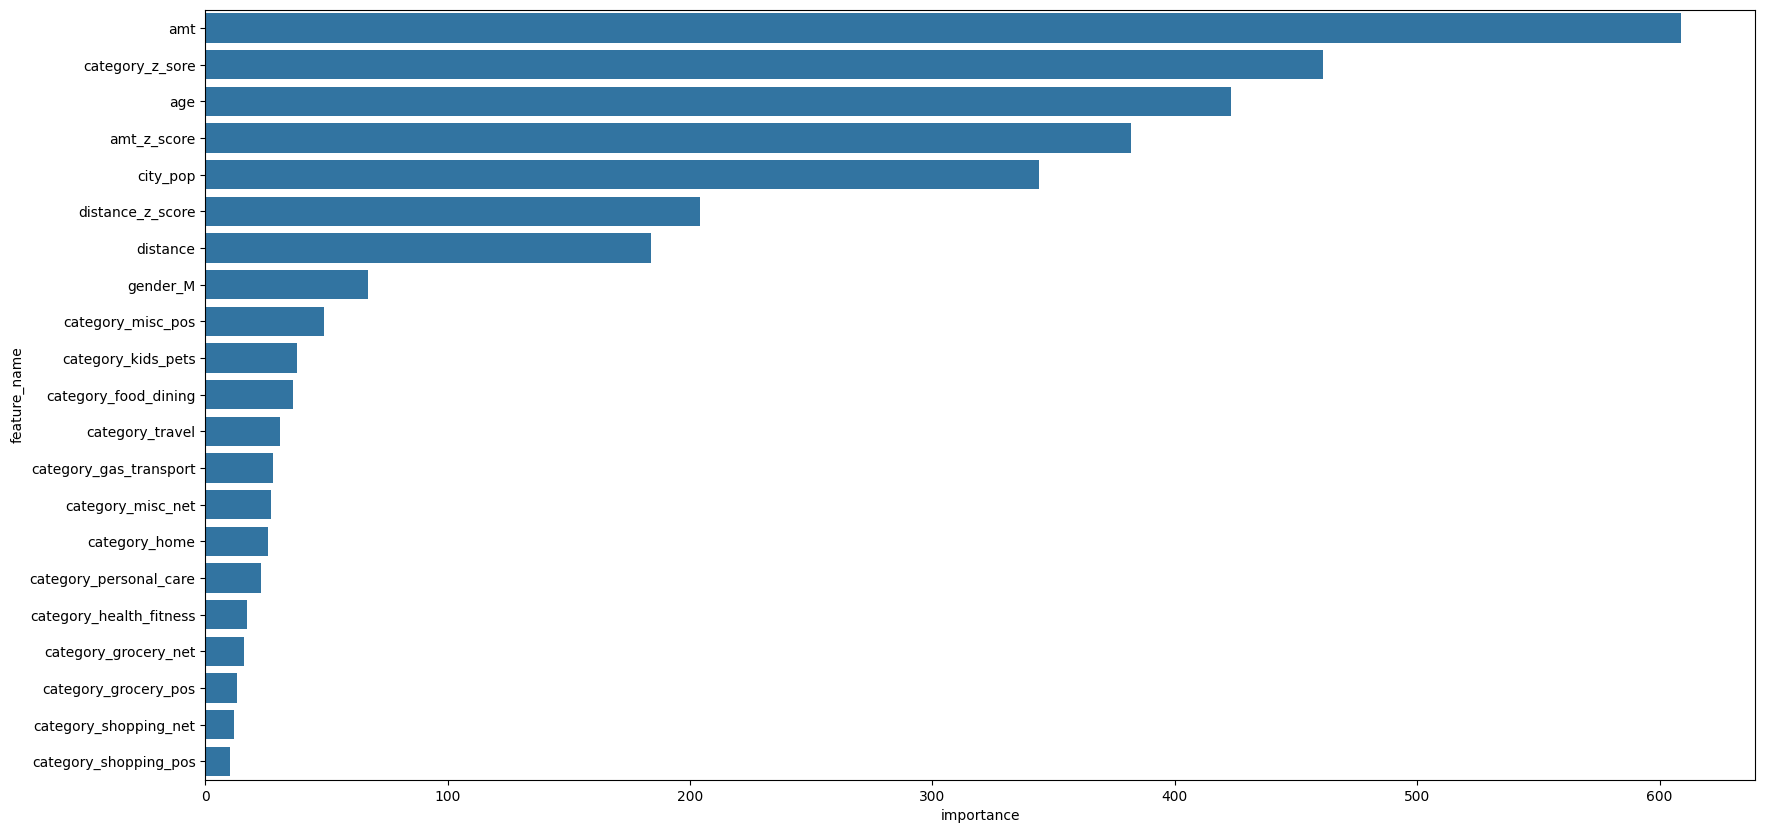

In [70]:
feature_imp = pd.DataFrame({
    'feature_name' : X_train.columns,
    'importance' : model_1.feature_importances_
}).sort_values('importance',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='importance',y='feature_name',data=feature_imp)

<Axes: xlabel='importance', ylabel='feature_name'>

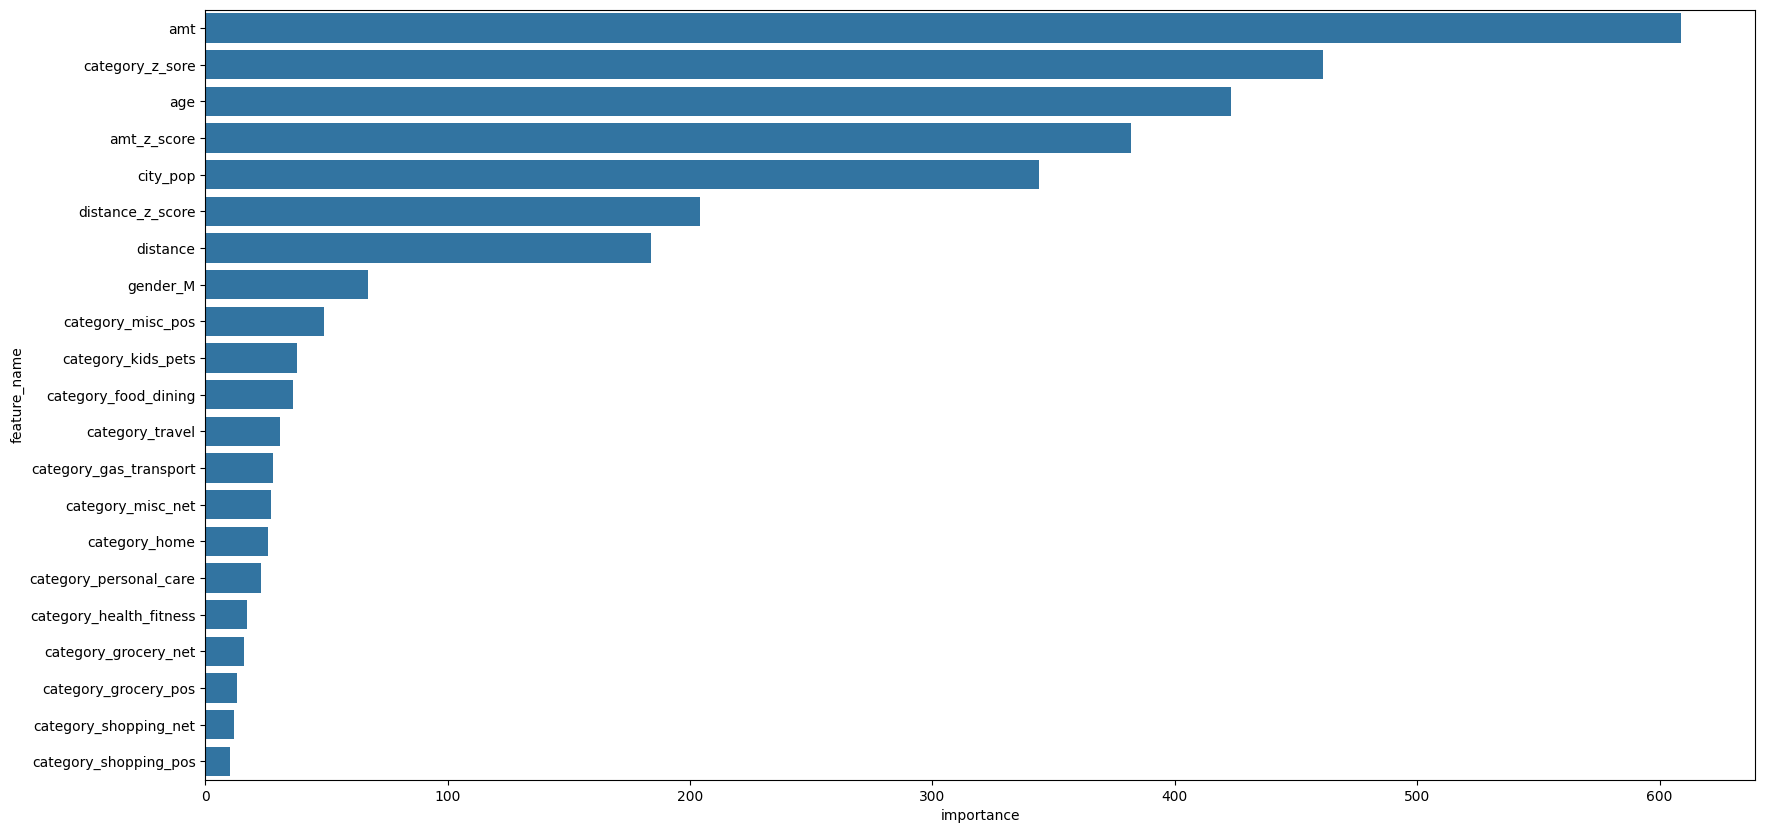

In [71]:
feature_imp_3 = pd.DataFrame(
    sorted(zip(model_3.feature_importance(),X_train.columns))
,columns=['Value','Feature'])
plt.figure(figsize=(20,10))
sns.barplot(x='importance',y='feature_name',data=feature_imp)